In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
scenarios = pd.read_csv('scenarios_robustness_last.csv').drop(columns = "Unnamed: 0")
results = pd.read_csv('outcomes_robustness_last.csv').drop(columns = "Unnamed: 0")

In [3]:
scenarios = scenarios.loc[:3999,:]

In [4]:
scenarios

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,99.0,291.616273,1.0,0.489529,316.552454,10.0,0.101082,211.524996,10.0,0.724330,...,0.0,0.0,4.0,0.0,6.0,0.0,3.0,0,0,dikesnet
1,20.0,298.344802,1.5,0.876143,202.781009,1.5,0.342723,261.903887,10.0,0.074208,...,0.0,0.0,4.0,0.0,6.0,0.0,3.0,1,0,dikesnet
2,130.0,343.240711,1.0,0.213972,284.029723,10.0,0.304751,187.643768,1.0,0.875140,...,0.0,0.0,4.0,0.0,6.0,0.0,3.0,2,0,dikesnet
3,48.0,102.967665,10.0,0.975204,34.125592,10.0,0.406718,86.532966,10.0,0.149588,...,0.0,0.0,4.0,0.0,6.0,0.0,3.0,3,0,dikesnet
4,123.0,41.829455,1.0,0.502477,226.832689,1.5,0.776911,310.519133,1.0,0.305231,...,0.0,0.0,4.0,0.0,6.0,0.0,3.0,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,104.0,344.905326,10.0,0.162108,231.310296,1.5,0.576175,192.360042,1.0,0.980079,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,995,3,dikesnet
3996,83.0,46.550078,10.0,0.617669,294.255647,10.0,0.798254,87.892847,1.5,0.191643,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,996,3,dikesnet
3997,109.0,306.321194,1.0,0.957352,112.653184,10.0,0.986448,144.128433,10.0,0.226964,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,997,3,dikesnet
3998,103.0,127.616373,1.0,0.103581,124.827182,1.5,0.224244,164.086249,1.5,0.667722,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,998,3,dikesnet


In [5]:
scenarios_death = pd.read_csv('median_death_robustness_scenarios.csv').drop(columns = "Unnamed: 0")
results_death = pd.read_csv('median_death_robustness_outcomes.csv').drop(columns = "Unnamed: 0")

In [6]:
scenarios_death['policy'].replace({0:4,1:5}, inplace = True)

In [7]:
scenarios_death

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,28.0,269.872874,10.0,0.917695,88.339730,1.0,0.582386,190.391896,1.0,0.897412,...,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0,4,dikesnet
1,102.0,94.038405,1.0,0.556928,304.957981,10.0,0.716426,146.847683,1.5,0.279674,...,5.0,0.0,0.0,2.0,0.0,0.0,0.0,1,4,dikesnet
2,65.0,248.501201,1.0,0.937142,79.373787,1.0,0.891559,317.193135,1.5,0.662190,...,5.0,0.0,0.0,2.0,0.0,0.0,0.0,2,4,dikesnet
3,19.0,276.057795,1.5,0.038198,202.976261,1.5,0.650331,292.718617,10.0,0.549238,...,5.0,0.0,0.0,2.0,0.0,0.0,0.0,3,4,dikesnet
4,121.0,137.192336,10.0,0.044310,207.075566,1.5,0.787199,124.067298,1.5,0.674900,...,5.0,0.0,0.0,2.0,0.0,0.0,0.0,4,4,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,92.0,102.625009,1.0,0.182941,89.935028,1.5,0.679579,277.827983,1.0,0.321500,...,6.0,0.0,4.0,1.0,0.0,0.0,0.0,995,5,dikesnet
1996,65.0,89.353105,1.5,0.482348,184.488458,10.0,0.277291,288.242630,10.0,0.996490,...,6.0,0.0,4.0,1.0,0.0,0.0,0.0,996,5,dikesnet
1997,62.0,51.668681,1.0,0.415799,128.670877,10.0,0.986457,252.264053,1.0,0.520558,...,6.0,0.0,4.0,1.0,0.0,0.0,0.0,997,5,dikesnet
1998,26.0,78.038480,1.5,0.677709,262.536394,1.5,0.838245,147.615925,10.0,0.737319,...,6.0,0.0,4.0,1.0,0.0,0.0,0.0,998,5,dikesnet


In [8]:
scenarios = pd.concat([scenarios,scenarios_death], ignore_index = True)

In [10]:
scenarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   A.0_ID flood wave shape  6000 non-null   float64
 1   A.1_Bmax                 6000 non-null   float64
 2   A.1_Brate                6000 non-null   float64
 3   A.1_pfail                6000 non-null   float64
 4   A.2_Bmax                 6000 non-null   float64
 5   A.2_Brate                6000 non-null   float64
 6   A.2_pfail                6000 non-null   float64
 7   A.3_Bmax                 6000 non-null   float64
 8   A.3_Brate                6000 non-null   float64
 9   A.3_pfail                6000 non-null   float64
 10  A.4_Bmax                 6000 non-null   float64
 11  A.4_Brate                6000 non-null   float64
 12  A.4_pfail                6000 non-null   float64
 13  A.5_Bmax                 6000 non-null   float64
 14  A.5_Brate               

In [11]:
results = results.loc[:3999,:]

In [12]:
results = pd.concat([results,results_death], ignore_index = True)

In [13]:
results

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,0.0,0.000000e+00,0.0,0.000000e+00,7.331545e+07,0.000000,0.000000e+00,3.728504e+07,0.000000,3.869163e+06,...,0.000000e+00,0.0,0.00000,0.000000e+00,0.00000,0.000000e+00,3.713080e+07,0.000000,115300000.0,0.000000
1,0.0,0.000000e+00,0.0,0.000000e+00,7.331545e+07,0.000000,0.000000e+00,3.728504e+07,0.000000,5.123211e+05,...,0.000000e+00,0.0,0.00000,0.000000e+00,0.00000,0.000000e+00,3.713080e+07,0.000000,115300000.0,0.000000
2,0.0,0.000000e+00,0.0,0.000000e+00,7.331545e+07,0.000000,0.000000e+00,3.728504e+07,0.000000,3.869227e+05,...,0.000000e+00,0.0,0.00000,0.000000e+00,0.00000,0.000000e+00,3.713080e+07,0.000000,115300000.0,0.000000
3,0.0,0.000000e+00,0.0,0.000000e+00,7.331545e+07,0.000000,0.000000e+00,3.728504e+07,0.000000,4.600465e+05,...,0.000000e+00,0.0,0.00000,0.000000e+00,0.00000,0.000000e+00,3.713080e+07,0.000000,115300000.0,0.000000
4,0.0,0.000000e+00,0.0,0.000000e+00,7.331545e+07,0.000000,0.000000e+00,3.728504e+07,0.000000,4.322258e+05,...,0.000000e+00,0.0,0.00000,0.000000e+00,0.00000,0.000000e+00,3.713080e+07,0.000000,115300000.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,5.397251e+07,0.0,1.442263e+06,0.000000e+00,0.000564,2.542427e+06,0.000000e+00,0.001783,8.340096e+06,...,3.972456e+07,0.0,0.00000,7.230049e+06,0.00000,3.300023e+06,0.000000e+00,0.001058,710400000.0,393.680945
5996,0.0,5.397251e+07,0.0,4.340593e+07,0.000000e+00,0.015997,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,3.972456e+07,0.0,0.00000,7.230049e+06,0.00000,4.172604e+05,0.000000e+00,0.000157,710400000.0,57.071216
5997,0.0,5.397251e+07,0.0,0.000000e+00,0.000000e+00,0.000000,2.915399e+06,0.000000e+00,0.001970,8.817956e+05,...,3.972456e+07,0.0,0.00000,7.230049e+06,0.00000,3.539057e+06,0.000000e+00,0.001236,710400000.0,450.993816
5998,0.0,5.397251e+07,0.0,1.560293e+06,0.000000e+00,0.000571,0.000000e+00,0.000000e+00,0.000000,4.046149e+05,...,3.972456e+07,0.0,0.00000,7.230049e+06,0.00000,7.187691e+06,0.000000e+00,0.002286,710400000.0,863.389674


In [16]:
list_death_columns = []

for i in range(3):
    for j in range(1, 6, 1):
        list_death_columns.append('A.{}_Expected Number of Deaths {}'.format(j, i))

In [17]:
list_death_columns

['A.1_Expected Number of Deaths 0',
 'A.2_Expected Number of Deaths 0',
 'A.3_Expected Number of Deaths 0',
 'A.4_Expected Number of Deaths 0',
 'A.5_Expected Number of Deaths 0',
 'A.1_Expected Number of Deaths 1',
 'A.2_Expected Number of Deaths 1',
 'A.3_Expected Number of Deaths 1',
 'A.4_Expected Number of Deaths 1',
 'A.5_Expected Number of Deaths 1',
 'A.1_Expected Number of Deaths 2',
 'A.2_Expected Number of Deaths 2',
 'A.3_Expected Number of Deaths 2',
 'A.4_Expected Number of Deaths 2',
 'A.5_Expected Number of Deaths 2']

In [18]:
list_damage_columns = []

for i in range(3):
    for j in range(1, 6, 1):
        list_damage_columns.append('A.{}_Expected Annual Damage {}'.format(j, i))

In [19]:
list_damage_columns

['A.1_Expected Annual Damage 0',
 'A.2_Expected Annual Damage 0',
 'A.3_Expected Annual Damage 0',
 'A.4_Expected Annual Damage 0',
 'A.5_Expected Annual Damage 0',
 'A.1_Expected Annual Damage 1',
 'A.2_Expected Annual Damage 1',
 'A.3_Expected Annual Damage 1',
 'A.4_Expected Annual Damage 1',
 'A.5_Expected Annual Damage 1',
 'A.1_Expected Annual Damage 2',
 'A.2_Expected Annual Damage 2',
 'A.3_Expected Annual Damage 2',
 'A.4_Expected Annual Damage 2',
 'A.5_Expected Annual Damage 2']

In [20]:
non_invest_columns = list_damage_columns + list_death_columns

In [21]:
costs = results.drop(columns = non_invest_columns)
deaths = results[list_death_columns]
damage = results[list_damage_columns]

In [22]:
results['total cost'] = costs.sum(axis = 1)

In [23]:
results['total deaths'] = deaths.sum(axis = 1)

In [24]:
results['total annual damage'] = damage.sum(axis = 1)

In [25]:
results['total deaths']

0       0.002200
1       0.002494
2       0.000090
3       0.000095
4       0.000108
          ...   
5995    0.005956
5996    0.016311
5997    0.004603
5998    0.007454
5999    0.019372
Name: total deaths, Length: 6000, dtype: float64

In [26]:
results['policy']= scenarios['policy']

In [27]:
results

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,total cost,total deaths,total annual damage,policy
0,0.0,0.000000e+00,0.0,0.000000e+00,7.331545e+07,0.000000,0.000000e+00,3.728504e+07,0.000000,3.869163e+06,...,0.00000,0.000000e+00,3.713080e+07,0.000000,115300000.0,0.000000,7.047285e+08,0.002200,7.436556e+06,0
1,0.0,0.000000e+00,0.0,0.000000e+00,7.331545e+07,0.000000,0.000000e+00,3.728504e+07,0.000000,5.123211e+05,...,0.00000,0.000000e+00,3.713080e+07,0.000000,115300000.0,0.000000,7.047283e+08,0.002494,7.384655e+06,0
2,0.0,0.000000e+00,0.0,0.000000e+00,7.331545e+07,0.000000,0.000000e+00,3.728504e+07,0.000000,3.869227e+05,...,0.00000,0.000000e+00,3.713080e+07,0.000000,115300000.0,0.000000,7.047274e+08,0.000090,3.869227e+05,0
3,0.0,0.000000e+00,0.0,0.000000e+00,7.331545e+07,0.000000,0.000000e+00,3.728504e+07,0.000000,4.600465e+05,...,0.00000,0.000000e+00,3.713080e+07,0.000000,115300000.0,0.000000,7.047274e+08,0.000095,4.600465e+05,0
4,0.0,0.000000e+00,0.0,0.000000e+00,7.331545e+07,0.000000,0.000000e+00,3.728504e+07,0.000000,4.322258e+05,...,0.00000,0.000000e+00,3.713080e+07,0.000000,115300000.0,0.000000,7.047274e+08,0.000108,4.322258e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,5.397251e+07,0.0,1.442263e+06,0.000000e+00,0.000564,2.542427e+06,0.000000e+00,0.001783,8.340096e+06,...,0.00000,3.300023e+06,0.000000e+00,0.001058,710400000.0,393.680945,1.379320e+09,0.005956,1.890435e+07,5
5996,0.0,5.397251e+07,0.0,4.340593e+07,0.000000e+00,0.015997,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.00000,4.172604e+05,0.000000e+00,0.000157,710400000.0,57.071216,1.379322e+09,0.016311,4.427175e+07,5
5997,0.0,5.397251e+07,0.0,0.000000e+00,0.000000e+00,0.000000,2.915399e+06,0.000000e+00,0.001970,8.817956e+05,...,0.00000,3.539057e+06,0.000000e+00,0.001236,710400000.0,450.993816,1.379318e+09,0.004603,1.040601e+07,5
5998,0.0,5.397251e+07,0.0,1.560293e+06,0.000000e+00,0.000571,0.000000e+00,0.000000e+00,0.000000,4.046149e+05,...,0.00000,7.187691e+06,0.000000e+00,0.002286,710400000.0,863.389674,1.379320e+09,0.007454,2.146104e+07,5


In [28]:
def signal_to_noise(results_df_policy):
    columns = ['total deaths', 'total annual damage']
    end_result = pd.DataFrame(index=results_df_policy.policy.unique(), columns=columns)

    for i in results_df_policy.policy.unique():
        for j in columns:
            mean = results_df_policy.loc[results_df_policy.policy == i, j].mean()
            stdev = results_df_policy.loc[results_df_policy.policy == i, j].std()
            end_result.loc[i,j] = mean * stdev
    return end_result

In [29]:
end_results = signal_to_noise(results)

In [30]:
end_results

,total deaths,total annual damage
0,3.61203e-05,5.62768e+14
1,0.0100782,3.80443e+15
2,0.00299668,2.22131e+16
3,0.00160506,2.13035e+16
4,0.00502924,2.37746e+16
5,0.00154824,9.66837e+15


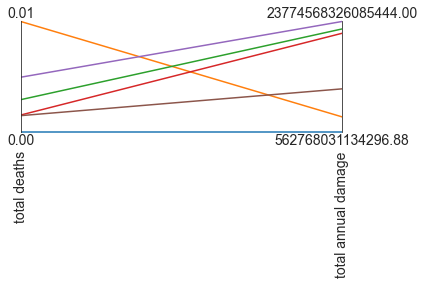

In [72]:
from ema_workbench.analysis import parcoords

limits = parcoords.get_limits(end_results.astype(float))
axes = parcoords.ParallelAxes(limits)
axes.plot(end_results.astype(float))


# we invert this axis so direction of desirability is the same
#axes.invert_axis('max_P')
plt.show()

In [33]:
end_results.sort_values(by='total deaths')

,total deaths,total annual damage
0,3.61203e-05,5.62768e+14
5,0.00154824,9.66837e+15
3,0.00160506,2.13035e+16
2,0.00299668,2.22131e+16
4,0.00502924,2.37746e+16
1,0.0100782,3.80443e+15


Based on Signal to noise ratio policy 0 (blue line) is the most robust policy which is the product of the optimization based on the reference scenario of the worst damage cost scenario. Policy 1 (orange line) and 5 (brown line) also show some promosing results.

In [34]:
#policies = pd.read_csv('policies.csv')

In [35]:
#scenarios.iloc[:, -10:-3].drop_duplicates()

In [36]:
#policies.iloc[:,-7:]

In [37]:
#policies.loc[[1,2,3,5],:]

In [51]:
#We leave out total cost since those will be the same for in each of the 1000 scenarios per policy
def maximum_regret(results_df_policy):
    columns = ['total deaths','total annual damage']
    end_result = pd.DataFrame(index=results_df_policy.policy.unique(), columns=columns)
    for i in results_df_policy.policy.unique():
        for j in columns:
            maximum = results_df_policy.loc[results_df_policy.policy == i, j].max()
            minimum = results_df_policy.loc[results_df_policy.policy == i, j].min()
            end_result.loc[i,j] = maximum - minimum
    return end_result

In [52]:
max_regret = maximum_regret(results)
max_regret

,total deaths,total annual damage
0,0.0820101,3.50444e+08
1,0.656339,4.20256e+08
2,0.280731,6.83103e+08
3,0.234682,7.2155e+08
4,0.30869,6.33088e+08
5,0.209528,4.33457e+08


In [53]:
max_regret.sort_values(by='total deaths')

,total deaths,total annual damage
0,0.0820101,3.50444e+08
5,0.209528,4.33457e+08
3,0.234682,7.2155e+08
2,0.280731,6.83103e+08
4,0.30869,6.33088e+08
1,0.656339,4.20256e+08


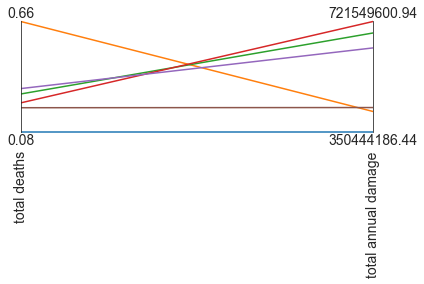

In [54]:
from ema_workbench.analysis import parcoords

limits = parcoords.get_limits(max_regret.astype(float))
axes = parcoords.ParallelAxes(limits)
axes.plot(max_regret.astype(float))


# we invert this axis so direction of desirability is the same
#axes.invert_axis('max_P')
plt.show()

Policy 0 is again the most robust (blue line), 5 is also nice (brown line) and 1 has promosing thingy aswell (orange)

In [84]:
#the following is the most robust policy according to Signal to noise
scenarios.loc[scenarios['policy'] == 0 ].iloc[0,19:-1]

0_RfR 0               0
0_RfR 1               1
0_RfR 2               1
1_RfR 0               0
1_RfR 1               0
1_RfR 2               0
2_RfR 0               0
2_RfR 1               1
2_RfR 2               1
3_RfR 0               0
3_RfR 1               1
3_RfR 2               0
4_RfR 0               0
4_RfR 1               0
4_RfR 2               0
EWS_DaysToThreat      2
A.1_DikeIncrease 0    0
A.1_DikeIncrease 1    7
A.1_DikeIncrease 2    0
A.2_DikeIncrease 0    7
A.2_DikeIncrease 1    3
A.2_DikeIncrease 2    0
A.3_DikeIncrease 0    8
A.3_DikeIncrease 1    1
A.3_DikeIncrease 2    0
A.4_DikeIncrease 0    0
A.4_DikeIncrease 1    4
A.4_DikeIncrease 2    0
A.5_DikeIncrease 0    6
A.5_DikeIncrease 1    0
A.5_DikeIncrease 2    3
scenario              0
policy                0
Name: 0, dtype: object

In [55]:
#policies.loc[[1,2,3,5],:]
#1 and 2 are RFR 3 and 5 are Dike increases

In [56]:
#policies.iloc[[1,2,3,5],15:35]

In [57]:
#results.groupby(by='policy').mean().loc[[1,2,3,5]]

In [88]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   A.1_Expected Annual Damage 0     6000 non-null   float64
 1   A.1_Dike Investment Costs 0      6000 non-null   float64
 2   A.1_Expected Number of Deaths 0  6000 non-null   float64
 3   A.2_Expected Annual Damage 0     6000 non-null   float64
 4   A.2_Dike Investment Costs 0      6000 non-null   float64
 5   A.2_Expected Number of Deaths 0  6000 non-null   float64
 6   A.3_Expected Annual Damage 0     6000 non-null   float64
 7   A.3_Dike Investment Costs 0      6000 non-null   float64
 8   A.3_Expected Number of Deaths 0  6000 non-null   float64
 9   A.4_Expected Annual Damage 0     6000 non-null   float64
 10  A.4_Dike Investment Costs 0      6000 non-null   int64  
 11  A.4_Expected Number of Deaths 0  6000 non-null   float64
 12  A.5_Expected Annual 

In [89]:
results["dike damage 1"] = results.iloc[:,0] + results.iloc[:,17] + results.iloc[:,34]
results["dike damage 2"] = results.iloc[:,3] + results.iloc[:,20] + results.iloc[:,37]
results["dike damage 3"] = results.iloc[:,6] + results.iloc[:,23] + results.iloc[:,40]
results["dike damage 4"] = results.iloc[:,9] + results.iloc[:,26] + results.iloc[:,43]
results["dike damage 5"] = results.iloc[:,12] + results.iloc[:,29] + results.iloc[:,46]

In [91]:
df_for_gini = results.groupby(by='policy').mean().loc[[0,1,5]].iloc[:,-5:]

In [92]:
df_for_gini

,dike damage 1,dike damage 2,dike damage 3,dike damage 4,dike damage 5
policy,,,,,
0,9.755262e+06,1.308925e+05,1.417554e+05,5.043015e+06,1.441197e+06
1,2.860025e+07,3.807056e+05,1.064054e+05,1.156693e+07,1.146553e+06
5,4.222069e+05,2.181103e+07,1.752220e+07,2.654399e+06,6.126150e+07


In [46]:
# list_death_columns = []
# list_annual_damage = []

# for i in range(3):
#     for j in range(1, 6, 1):
#         list_death_columns.append('A.{}_Expected Number of Deaths {}'.format(j, i))
#         list_annual_damage.append('A.{}_Expected Annual Damage {}'.format(j, i))

In [47]:
# damage = results[list_annual_damage]
# damage

,A.1_Expected Annual Damage 0,A.2_Expected Annual Damage 0,A.3_Expected Annual Damage 0,A.4_Expected Annual Damage 0,A.5_Expected Annual Damage 0,A.1_Expected Annual Damage 1,A.2_Expected Annual Damage 1,A.3_Expected Annual Damage 1,A.4_Expected Annual Damage 1,A.5_Expected Annual Damage 1,A.1_Expected Annual Damage 2,A.2_Expected Annual Damage 2,A.3_Expected Annual Damage 2,A.4_Expected Annual Damage 2,A.5_Expected Annual Damage 2
0,0.0,0.000000e+00,0.000000e+00,3.869163e+06,0.000000e+00,0.0,0.0,0.0,0.000000,3.567393e+06,0.0,0.0,0.0,0.00000,0.000000e+00
1,0.0,0.000000e+00,0.000000e+00,5.123211e+05,3.436914e+06,0.0,0.0,0.0,0.000000,3.435419e+06,0.0,0.0,0.0,0.00000,0.000000e+00
2,0.0,0.000000e+00,0.000000e+00,3.869227e+05,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.00000,0.000000e+00
3,0.0,0.000000e+00,0.000000e+00,4.600465e+05,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.00000,0.000000e+00
4,0.0,0.000000e+00,0.000000e+00,4.322258e+05,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.00000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,1.442263e+06,2.542427e+06,8.340096e+06,0.000000e+00,0.0,0.0,0.0,390013.127407,2.889529e+06,0.0,0.0,0.0,0.00000,3.300023e+06
5996,0.0,4.340593e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,4.485607e+05,0.0,0.0,0.0,0.00000,4.172604e+05
5997,0.0,0.000000e+00,2.915399e+06,8.817956e+05,0.000000e+00,0.0,0.0,0.0,0.000000,3.069761e+06,0.0,0.0,0.0,0.00000,3.539057e+06
5998,0.0,1.560293e+06,0.000000e+00,4.046149e+05,6.523291e+06,0.0,0.0,0.0,0.000000,5.785145e+06,0.0,0.0,0.0,0.00000,7.187691e+06


In [48]:
# deaths = results[list_death_columns]
# deaths

,A.1_Expected Number of Deaths 0,A.2_Expected Number of Deaths 0,A.3_Expected Number of Deaths 0,A.4_Expected Number of Deaths 0,A.5_Expected Number of Deaths 0,A.1_Expected Number of Deaths 1,A.2_Expected Number of Deaths 1,A.3_Expected Number of Deaths 1,A.4_Expected Number of Deaths 1,A.5_Expected Number of Deaths 1,A.1_Expected Number of Deaths 2,A.2_Expected Number of Deaths 2,A.3_Expected Number of Deaths 2,A.4_Expected Number of Deaths 2,A.5_Expected Number of Deaths 2
0,0.0,0.000000,0.000000,0.000856,0.000000,0.0,0.0,0.0,0.000000,0.001344,0.0,0.0,0.0,0.00000,0.000000
1,0.0,0.000000,0.000000,0.000100,0.001103,0.0,0.0,0.0,0.000000,0.001291,0.0,0.0,0.0,0.00000,0.000000
2,0.0,0.000000,0.000000,0.000090,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000
3,0.0,0.000000,0.000000,0.000095,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000
4,0.0,0.000000,0.000000,0.000108,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.000564,0.001783,0.001484,0.000000,0.0,0.0,0.0,0.000073,0.000994,0.0,0.0,0.0,0.00000,0.001058
5996,0.0,0.015997,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000157,0.0,0.0,0.0,0.00000,0.000157
5997,0.0,0.000000,0.001970,0.000161,0.000000,0.0,0.0,0.0,0.000000,0.001236,0.0,0.0,0.0,0.00000,0.001236
5998,0.0,0.000571,0.000000,0.000078,0.002232,0.0,0.0,0.0,0.000000,0.002286,0.0,0.0,0.0,0.00000,0.002286


In [49]:
# for j in range(1, 6, 1):
#     damage['aggregated_damage {}'.format(j)] = (damage['A.{}_Expected Annual Damage 0'.format(j)]+\
#     damage['A.{}_Expected Annual Damage 1'.format(j)]+\
#     damage['A.{}_Expected Annual Damage 2'.format(j)])

<ipython-input-49-1983f28db267>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage['aggregated_damage {}'.format(j)] = (damage['A.{}_Expected Annual Damage 0'.format(j)]+\


In [50]:
# damage

,A.1_Expected Annual Damage 0,A.2_Expected Annual Damage 0,A.3_Expected Annual Damage 0,A.4_Expected Annual Damage 0,A.5_Expected Annual Damage 0,A.1_Expected Annual Damage 1,A.2_Expected Annual Damage 1,A.3_Expected Annual Damage 1,A.4_Expected Annual Damage 1,A.5_Expected Annual Damage 1,A.1_Expected Annual Damage 2,A.2_Expected Annual Damage 2,A.3_Expected Annual Damage 2,A.4_Expected Annual Damage 2,A.5_Expected Annual Damage 2,aggregated_damage 1,aggregated_damage 2,aggregated_damage 3,aggregated_damage 4,aggregated_damage 5
0,0.0,0.000000e+00,0.000000e+00,3.869163e+06,0.000000e+00,0.0,0.0,0.0,0.000000,3.567393e+06,0.0,0.0,0.0,0.00000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,3.869163e+06,3.567393e+06
1,0.0,0.000000e+00,0.000000e+00,5.123211e+05,3.436914e+06,0.0,0.0,0.0,0.000000,3.435419e+06,0.0,0.0,0.0,0.00000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.123211e+05,6.872333e+06
2,0.0,0.000000e+00,0.000000e+00,3.869227e+05,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.00000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,3.869227e+05,0.000000e+00
3,0.0,0.000000e+00,0.000000e+00,4.600465e+05,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.00000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,4.600465e+05,0.000000e+00
4,0.0,0.000000e+00,0.000000e+00,4.322258e+05,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.00000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,4.322258e+05,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,1.442263e+06,2.542427e+06,8.340096e+06,0.000000e+00,0.0,0.0,0.0,390013.127407,2.889529e+06,0.0,0.0,0.0,0.00000,3.300023e+06,0.0,1.442263e+06,2.542427e+06,8.730109e+06,6.189551e+06
5996,0.0,4.340593e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,4.485607e+05,0.0,0.0,0.0,0.00000,4.172604e+05,0.0,4.340593e+07,0.000000e+00,0.000000e+00,8.658211e+05
5997,0.0,0.000000e+00,2.915399e+06,8.817956e+05,0.000000e+00,0.0,0.0,0.0,0.000000,3.069761e+06,0.0,0.0,0.0,0.00000,3.539057e+06,0.0,0.000000e+00,2.915399e+06,8.817956e+05,6.608818e+06
5998,0.0,1.560293e+06,0.000000e+00,4.046149e+05,6.523291e+06,0.0,0.0,0.0,0.000000,5.785145e+06,0.0,0.0,0.0,0.00000,7.187691e+06,0.0,1.560293e+06,0.000000e+00,4.046149e+05,1.949613e+07


In [51]:
# deaths

,A.1_Expected Number of Deaths 0,A.2_Expected Number of Deaths 0,A.3_Expected Number of Deaths 0,A.4_Expected Number of Deaths 0,A.5_Expected Number of Deaths 0,A.1_Expected Number of Deaths 1,A.2_Expected Number of Deaths 1,A.3_Expected Number of Deaths 1,A.4_Expected Number of Deaths 1,A.5_Expected Number of Deaths 1,A.1_Expected Number of Deaths 2,A.2_Expected Number of Deaths 2,A.3_Expected Number of Deaths 2,A.4_Expected Number of Deaths 2,A.5_Expected Number of Deaths 2
0,0.0,0.000000,0.000000,0.000856,0.000000,0.0,0.0,0.0,0.000000,0.001344,0.0,0.0,0.0,0.00000,0.000000
1,0.0,0.000000,0.000000,0.000100,0.001103,0.0,0.0,0.0,0.000000,0.001291,0.0,0.0,0.0,0.00000,0.000000
2,0.0,0.000000,0.000000,0.000090,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000
3,0.0,0.000000,0.000000,0.000095,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000
4,0.0,0.000000,0.000000,0.000108,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.000564,0.001783,0.001484,0.000000,0.0,0.0,0.0,0.000073,0.000994,0.0,0.0,0.0,0.00000,0.001058
5996,0.0,0.015997,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000157,0.0,0.0,0.0,0.00000,0.000157
5997,0.0,0.000000,0.001970,0.000161,0.000000,0.0,0.0,0.0,0.000000,0.001236,0.0,0.0,0.0,0.00000,0.001236
5998,0.0,0.000571,0.000000,0.000078,0.002232,0.0,0.0,0.0,0.000000,0.002286,0.0,0.0,0.0,0.00000,0.002286


In [52]:
# for j in range(1, 6, 1):
#     deaths['aggregated_deaths {}'.format(j)] = (deaths['A.{}_Expected Number of Deaths 0'.format(j)]+\
#     deaths['A.{}_Expected Number of Deaths 1'.format(j)]+\
#     deaths['A.{}_Expected Number of Deaths 2'.format(j)])

<ipython-input-52-3afd142231d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['aggregated_deaths {}'.format(j)] = (deaths['A.{}_Expected Number of Deaths 0'.format(j)]+\


In [53]:
# gini_frame = deaths.iloc[:,-5:].merge(damage.iloc[:,-5:], left_index=True, right_index=True) 


In [54]:
# gini_frame['policy'] = results['policy']

In [55]:
# gini_frame

,aggregated_deaths 1,aggregated_deaths 2,aggregated_deaths 3,aggregated_deaths 4,aggregated_deaths 5,aggregated_damage 1,aggregated_damage 2,aggregated_damage 3,aggregated_damage 4,aggregated_damage 5,policy
0,0.0,0.000000,0.000000,0.000856,0.001344,0.0,0.000000e+00,0.000000e+00,3.869163e+06,3.567393e+06,0
1,0.0,0.000000,0.000000,0.000100,0.002394,0.0,0.000000e+00,0.000000e+00,5.123211e+05,6.872333e+06,0
2,0.0,0.000000,0.000000,0.000090,0.000000,0.0,0.000000e+00,0.000000e+00,3.869227e+05,0.000000e+00,0
3,0.0,0.000000,0.000000,0.000095,0.000000,0.0,0.000000e+00,0.000000e+00,4.600465e+05,0.000000e+00,0
4,0.0,0.000000,0.000000,0.000108,0.000000,0.0,0.000000e+00,0.000000e+00,4.322258e+05,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.000564,0.001783,0.001558,0.002052,0.0,1.442263e+06,2.542427e+06,8.730109e+06,6.189551e+06,5
5996,0.0,0.015997,0.000000,0.000000,0.000314,0.0,4.340593e+07,0.000000e+00,0.000000e+00,8.658211e+05,5
5997,0.0,0.000000,0.001970,0.000161,0.002472,0.0,0.000000e+00,2.915399e+06,8.817956e+05,6.608818e+06,5
5998,0.0,0.000571,0.000000,0.000078,0.006805,0.0,1.560293e+06,0.000000e+00,4.046149e+05,1.949613e+07,5


In [93]:
 mean_gini = results.groupby(by='policy').mean().loc[[0,1,5]].iloc[:,-5:]

In [112]:
 max_gini = results.groupby(by='policy').max().loc[[0,1,5]].iloc[:,-5:]

In [95]:
#calculating gini index with yasin's stack overflow code
def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)
    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [96]:
mean_gini

,dike damage 1,dike damage 2,dike damage 3,dike damage 4,dike damage 5
policy,,,,,
0,9.755262e+06,1.308925e+05,1.417554e+05,5.043015e+06,1.441197e+06
1,2.860025e+07,3.807056e+05,1.064054e+05,1.156693e+07,1.146553e+06
5,4.222069e+05,2.181103e+07,1.752220e+07,2.654399e+06,6.126150e+07


In [106]:

mean_gini['gini_result_damage'] = 0 
for i,j in enumerate([0,1,5]):
    mean_gini.loc[j,'gini_result_damage'] = gini(np.array(mean_gini.iloc[i,:-2]))

In [105]:
mean_gini.iloc[2,:]

dike damage 1         4.222069e+05
dike damage 2         2.181103e+07
dike damage 3         1.752220e+07
dike damage 4         2.654399e+06
dike damage 5         6.126150e+07
gini_result_damage             NaN
Name: 5, dtype: float64

In [107]:
mean_gini

,dike damage 1,dike damage 2,dike damage 3,dike damage 4,dike damage 5,gini_result_damage
policy,,,,,,
0,9.755262e+06,1.308925e+05,1.417554e+05,5.043015e+06,1.441197e+06,0.560257
1,2.860025e+07,3.807056e+05,1.064054e+05,1.156693e+07,1.146553e+06,0.594450
5,4.222069e+05,2.181103e+07,1.752220e+07,2.654399e+06,6.126150e+07,0.465896


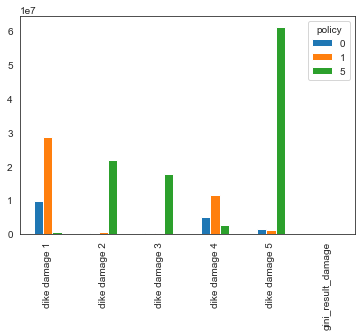

In [124]:
mean_gini.T.plot.bar()

In [113]:

max_gini['gini_result_damage'] = 0 
for i,j in enumerate([0,1,5]):
    max_gini.loc[j,'gini_result_damage'] = gini(np.array(max_gini.iloc[i,:-2]))

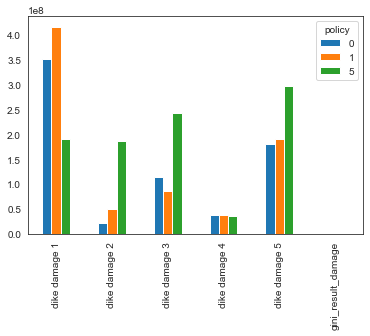

In [126]:
max_gini.T.plot.bar()